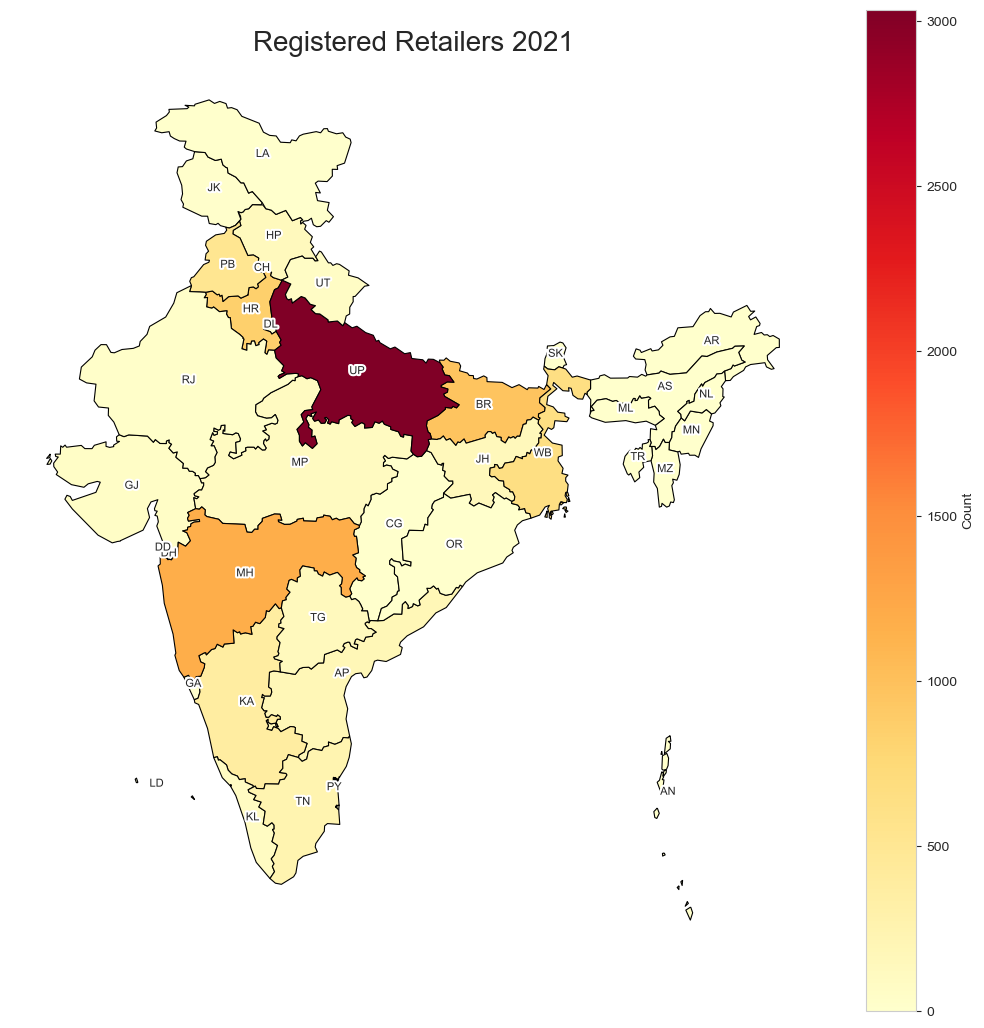

In [13]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapely as shp
from matplotlib import patheffects

from shapely.geometry import Point
sns.set_style('whitegrid')

fp = r'Maps_with_python-master\india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

df = pd.read_csv('india_heatmap.csv')
pd.set_option('display.max_columns', None)

#Merging the data
merged = map_df.set_index('st_nm').join(df.set_index('State'))
merged['Registered Retailers 2021'] = merged['Registered Retailers 2021'].replace(np.nan, 0)
merged.head()

# Create dictionary of state abbreviations
state_abbr = {'Andaman and Nicobar Islands': 'AN', 'Andhra Pradesh': 'AP', 'Arunachal Pradesh': 'AR',
              'Assam': 'AS', 'Bihar': 'BR', 'Chandigarh': 'CH', 'Chhattisgarh': 'CG', 'Dadra and Nagar Haveli and Daman and Diu': 'DN',
              'Delhi': 'DL', 'Goa': 'GA', 'Gujarat': 'GJ', 'Haryana': 'HR', 'Himachal Pradesh': 'HP', 'Jammu and Kashmir': 'JK',
              'Jharkhand': 'JH', 'Karnataka': 'KA', 'Kerala': 'KL', 'Ladakh': 'LA', 'Lakshadweep': 'LD', 'Madhya Pradesh': 'MP',
              'Maharashtra': 'MH', 'Manipur': 'MN', 'Meghalaya': 'ML', 'Mizoram': 'MZ', 'Nagaland': 'NL', 'Odisha': 'OR',
              'Puducherry': 'PY', 'Punjab': 'PB', 'Rajasthan': 'RJ', 'Sikkim': 'SK', 'Tamil Nadu': 'TN', 'Telangana': 'TG',
              'Tripura': 'TR', 'Uttar Pradesh': 'UP', 'Uttarakhand': 'UT', 'West Bengal': 'WB', 'Dadra and Nagar Haveli': 'DH', 'Daman and Diu': 'DD'}

# Replace full state names with abbreviations in map_df_copy
map_df_copy['st_nm'] = map_df_copy['st_nm'].replace(state_abbr)


#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(13, 13))
ax.axis('off')
ax.set_title('Registered Retailers 2021', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='Registered Retailers 2021',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Count"})

# Add state labels to the plot with a drop shadow effect
for idx, row in map_df_copy.iterrows():
    if row['st_nm'] in state_abbr.values():
        txt = plt.annotate(text=row['st_nm'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center', fontsize=8)
        txt.set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])

plt.savefig('heatmap.jpg', dpi=300, bbox_inches='tight')